<a href="https://colab.research.google.com/github/subro12/FacebookFriendRecommendation/blob/main/S_FB_featurization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/Case_studies/Facebook/Facebook/

/content/drive/.shortcut-targets-by-id/1c50Q5RcmdpMYj1jCPc3ShOE2y4G8G2ez/Facebook


In [4]:
%ls

data/  FB_EDA.ipynb  FB_featurization.ipynb  FB_Models.ipynb


In [5]:
train_graph = nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph,nodetype=int)

In [6]:
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


##### Similarity measurements - Feature Engineering

###### Jaccard distance

In [62]:
def jaccard_for_followees(a,b):
  jaccard_index = 0
  try:
    if len(set(train_graph.successors(a)))==0 or len(set(train_graph.successors(b)))==0:
      return 0
    jaccard_index = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/(len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    return jaccard_index
  except:
    return 0
  return jaccard_index

In [63]:
jaccard_for_followees(random.randint(1,1780722),random.randint(1,1780722))
# jaccard_for_followers(273084,1505602)

0.0

In [64]:
def jaccard_for_followers(a,b):
  jaccard_index=0
  try:
    if len(set(train_graph.predecessors(a)))==0 or len(set(train_graph.predecessors(b)))==0:
      return 0
    jaccard_index = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/(len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
    return jaccard_index
  except:
    return 0
  return jaccard_index

In [65]:
print(jaccard_for_followers(273084,470294))

0.0


###### Cosine Distance

In [66]:
def cosine_for_followees(a,b):
  try:
    if len(set(train_graph.successors(a)))==0 | len(set(train_graph.successors(b)))==0:
      return 0
    consine = len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))/(math.sqrt(len(set(train_graph.successors(a)))*len(set(train_graph.successors(b)))))
    return cosine
  except:
    return 0

In [67]:
print(cosine_for_followees(273084,1505602))

0


In [70]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [71]:
print(cosine_for_followers(2,470294))

0


In [43]:
#node 1635354 not in graph 
print(jaccard_for_followees(669354,1635354))

0


In [7]:
G=nx.path_graph(4)
print(b)
# [0, 1, 2, 3]
# nx.predecessor(G,0)
# {0: [], 1: [0], 2: [1], 3: [2]}

[0, 1, 2, 3]


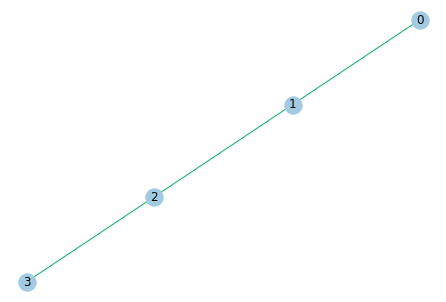

In [13]:
nx.draw(G,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)